In [37]:
import pickle
import sys
from pprint import pprint
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
def mark_values(x_axis, y_axis):
    """
    mark the actul values on the plot
    :param x_axis: a list of x-axis values
    :type x_axis: list
    """
    for x, y in zip(x_axis, y_axis):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center')

        
def make_plots_across_share(data_type, zero_style, model_type, eval_method):
    xasis = list(range(1, 13))
    share_25 = {"con_auc": [], "con_accu": [],
                 "con_cor": [], "con_ppl": [],
                 "dem_auc": [], "dem_accu": [],
                 "dem_cor": [], "dem_ppl": [],
                 "ratio_auc": [], "ratio_accu": [],
                 "ratio_cor": [], "ratio_ppl": [],
                 "norm_auc":[], "norm_accu":[],
                 "norm_cor":[], "norm_ppl":[]}
    share_50 = {"con_auc": [], "con_accu": [],
                 "con_cor": [], "con_ppl": [],
                 "dem_auc": [], "dem_accu": [],
                 "dem_cor": [], "dem_ppl": [],
                 "ratio_auc": [], "ratio_accu": [],
                 "ratio_cor": [], "ratio_ppl": [],
                 "norm_auc":[], "norm_accu":[],
                 "norm_cor":[], "norm_ppl":[]}
    share_75 = {"con_auc": [], "con_accu": [],
                 "con_cor": [], "con_ppl": [],
                 "dem_auc": [], "dem_accu": [],
                 "dem_cor": [], "dem_ppl": [],
                 "ratio_auc": [], "ratio_accu": [],
                 "ratio_cor": [], "ratio_ppl": [],
                 "norm_auc":[], "norm_accu":[],
                 "norm_cor":[], "norm_ppl":[]}
    share_100 = {"con_auc": [], "con_accu": [],
                 "con_cor": [], "con_ppl": [],
                 "dem_auc": [], "dem_accu": [],
                 "dem_cor": [], "dem_ppl": [],
                 "ratio_auc": [], "ratio_accu": [],
                 "ratio_cor": [], "ratio_ppl": [],
                 "norm_auc":[], "norm_accu":[],
                 "norm_cor":[], "norm_ppl":[]}
    file_25 = "../ppl/accumu_{}_{}_25.pkl".format(data_type, zero_style)
    file_50 = "../ppl/accumu_{}_{}_50.pkl".format(data_type, zero_style)
    file_75 = "../ppl/accumu_{}_{}_75.pkl".format(data_type, zero_style)
    file_100 = "../ppl/accumu_{}_{}_100.pkl".format(data_type, zero_style)
    with open(file_25, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            if isinstance(res_dict[key], list):
                share_25[key].extend(res_dict[key])
            else:
                share_25[key].append(res_dict[key])
    with open(file_50, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            if isinstance(res_dict[key], list):
                share_50[key].extend(res_dict[key])
            else:
                share_50[key].append(res_dict[key])
    with open(file_75, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            if isinstance(res_dict[key], list):
                share_75[key].extend(res_dict[key])
            else:
                share_75[key].append(res_dict[key])
    with open(file_100, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            if isinstance(res_dict[key], list):
                share_100[key].extend(res_dict[key])
            else:
                share_100[key].append(res_dict[key])
    plt.plot(xasis, share_25[model_type+"_"+eval_method], label="25%")
    plt.plot(xasis, share_50[model_type+"_"+eval_method], label="50%")
    plt.plot(xasis, share_75[model_type+"_"+eval_method], label="75%")
    plt.plot(xasis, share_100[model_type+"_"+eval_method], label="100%")
    plt.title("{} model on {} dataset with {} zeroing method, {}".format(model_type, data_type, zero_style, eval_method))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, share_25[model_type+"_"+eval_method])
    mark_values(xasis, share_50[model_type+"_"+eval_method])
    mark_values(xasis, share_75[model_type+"_"+eval_method])
    mark_values(xasis, share_100[model_type+"_"+eval_method])
    plt.show()

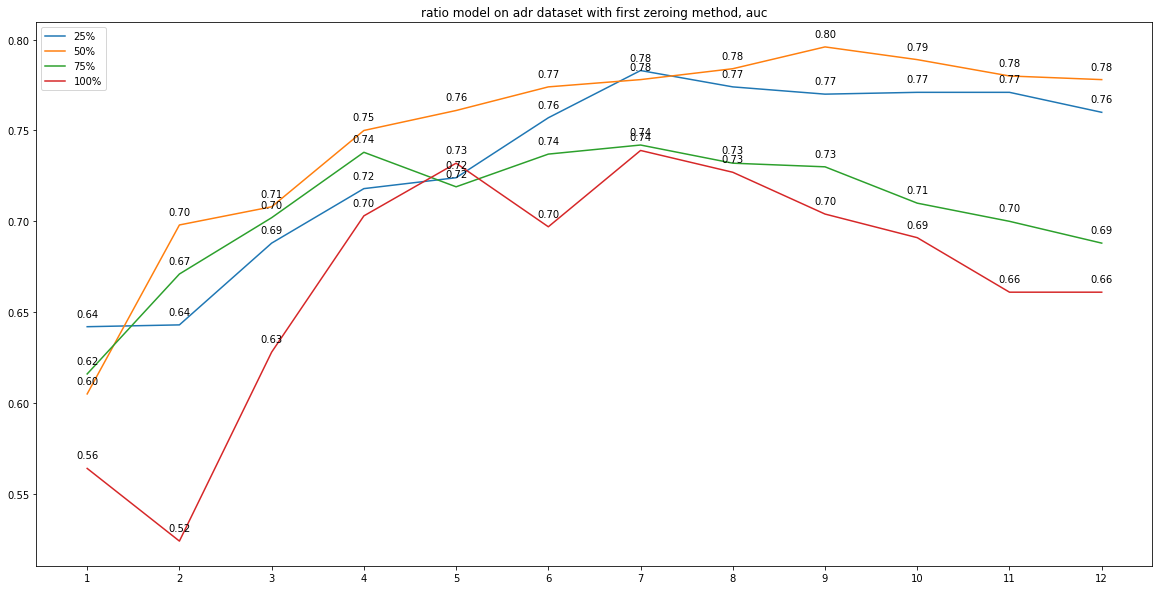

In [3]:
make_plots_across_share("adr", "first", "ratio", "auc")

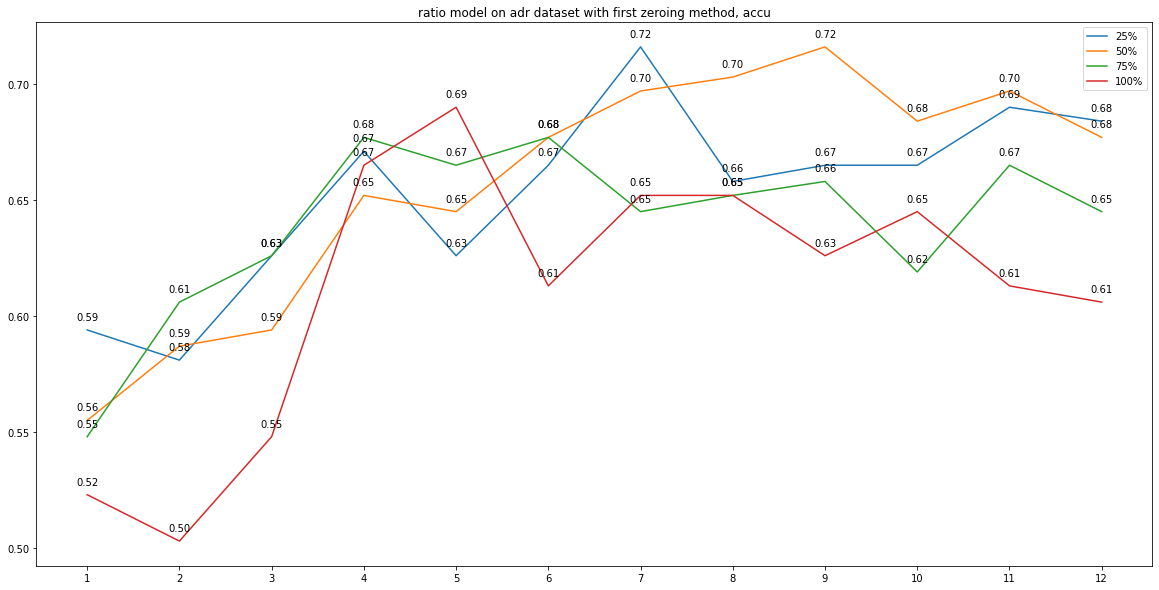

In [4]:
make_plots_across_share("adr", "first", "ratio", "accu")

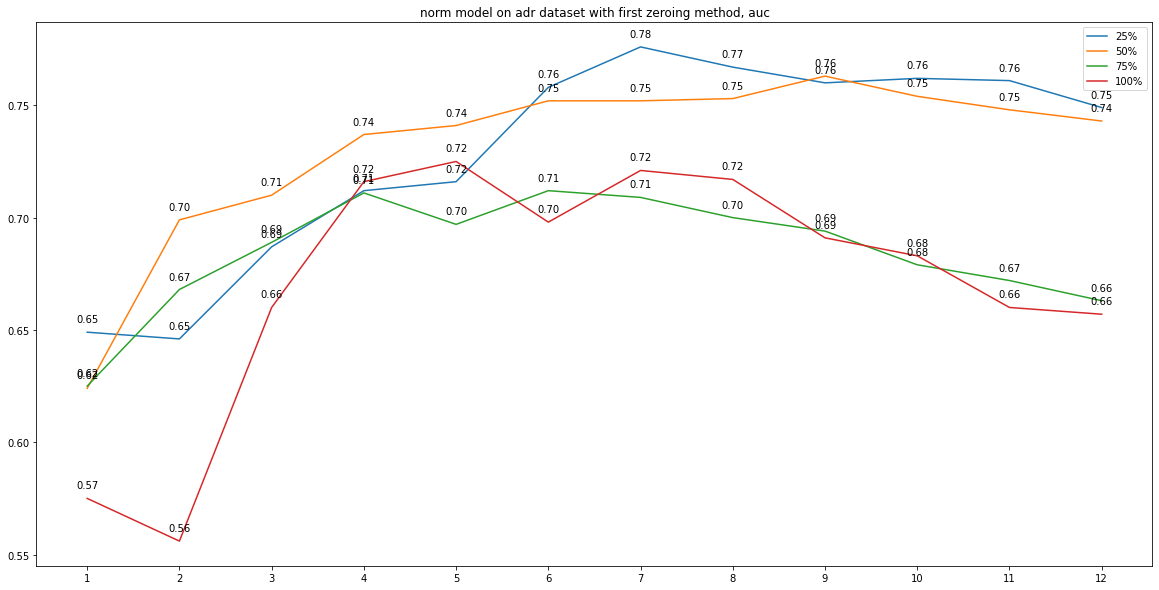

In [5]:
make_plots_across_share("adr", "first", "norm", "auc")

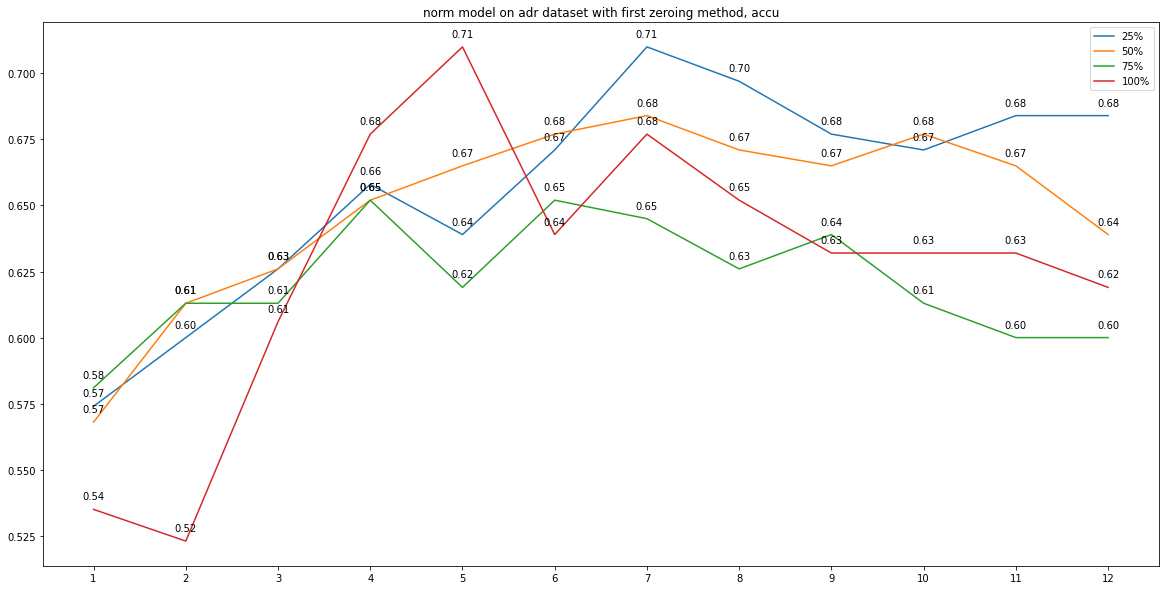

In [6]:
make_plots_across_share("adr", "first", "norm", "accu")

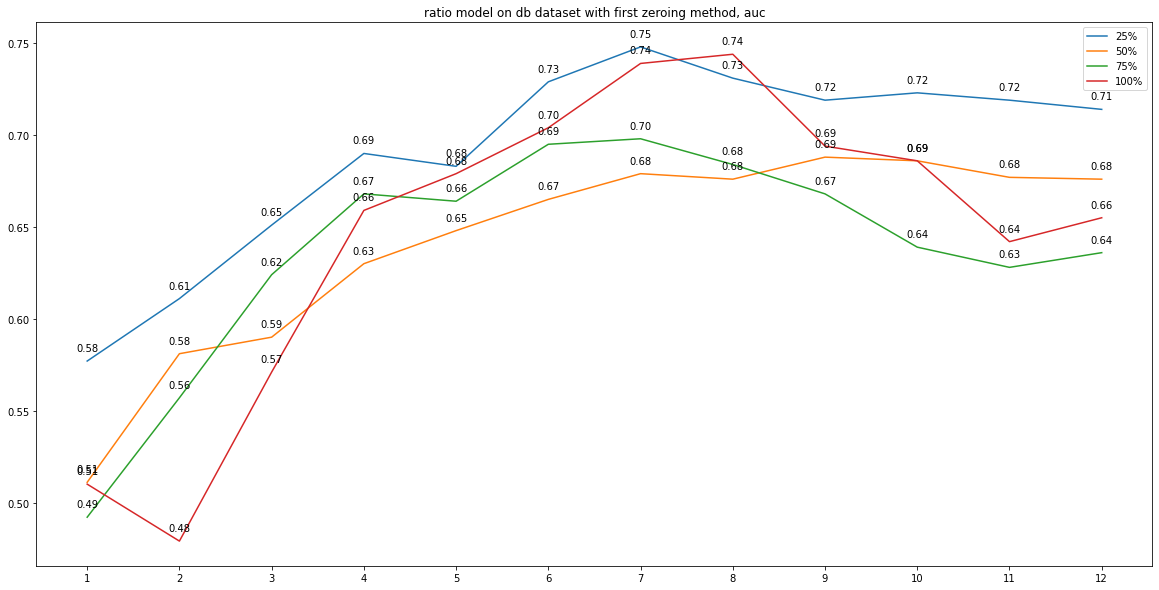

In [7]:
make_plots_across_share("db", "first", "ratio", "auc")

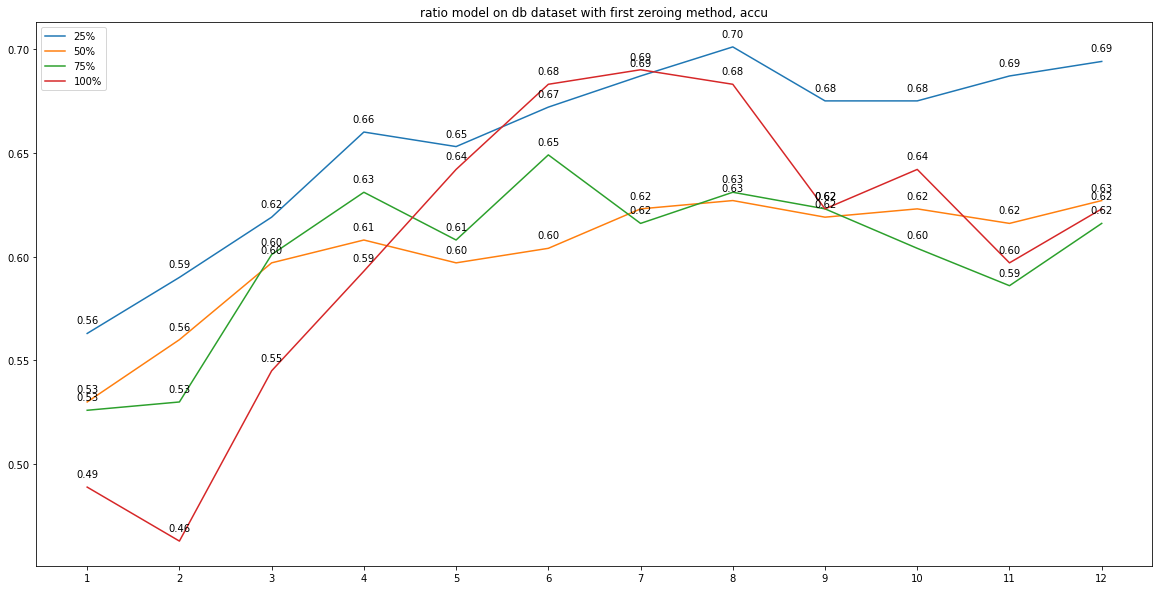

In [8]:
make_plots_across_share("db", "first", "ratio", "accu")

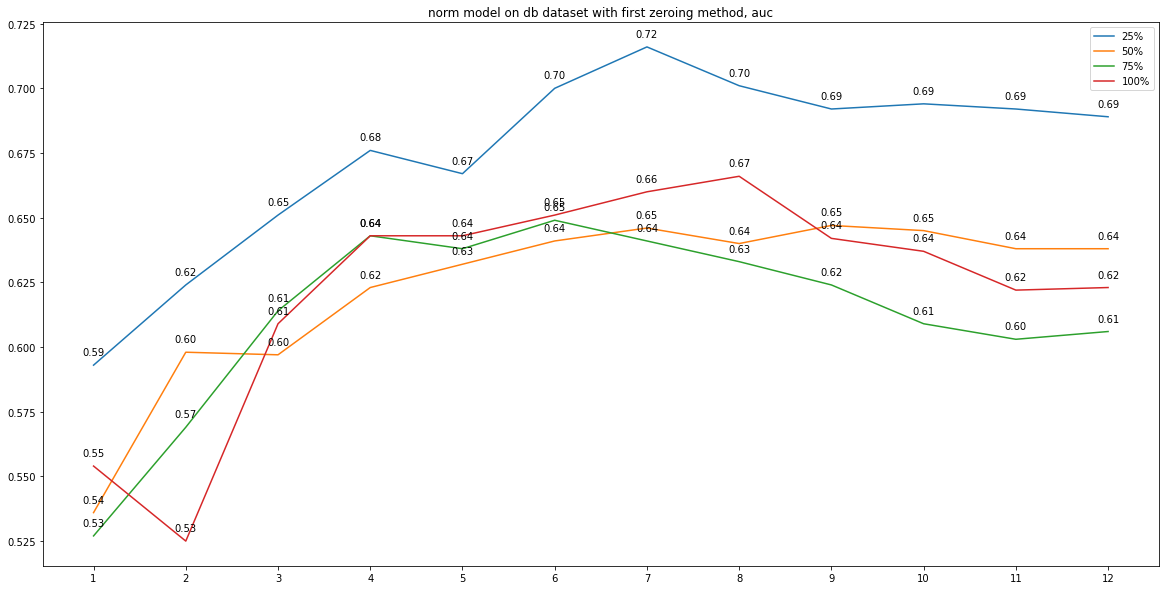

In [9]:
make_plots_across_share("db", "first", "norm", "auc")

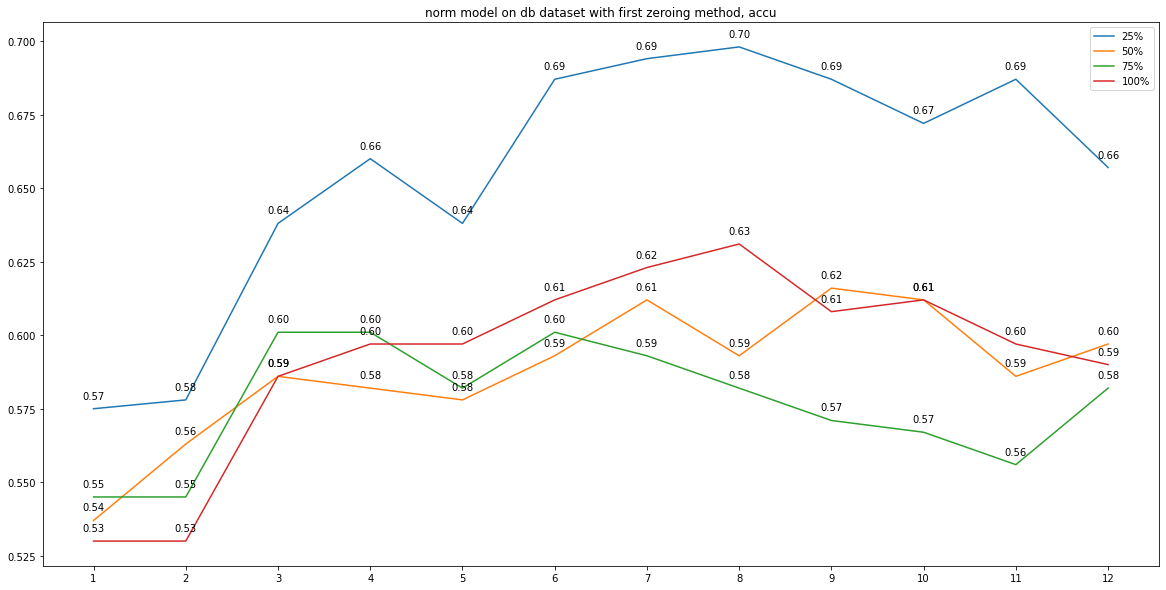

In [10]:
make_plots_across_share("db", "first", "norm", "accu")

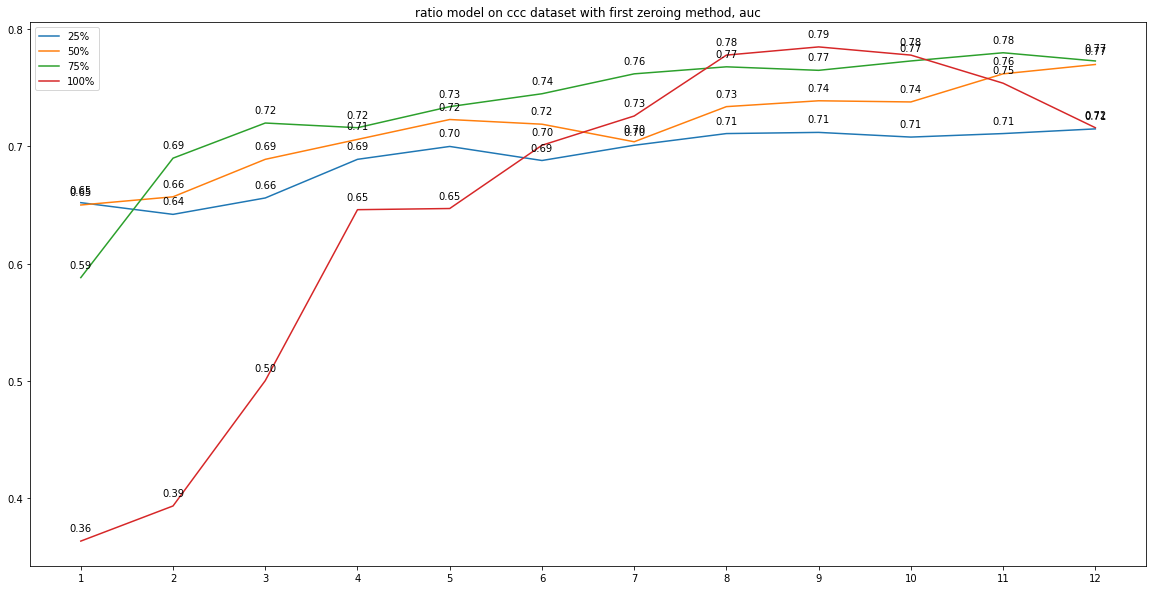

In [11]:
make_plots_across_share("ccc", "first", "ratio", "auc")

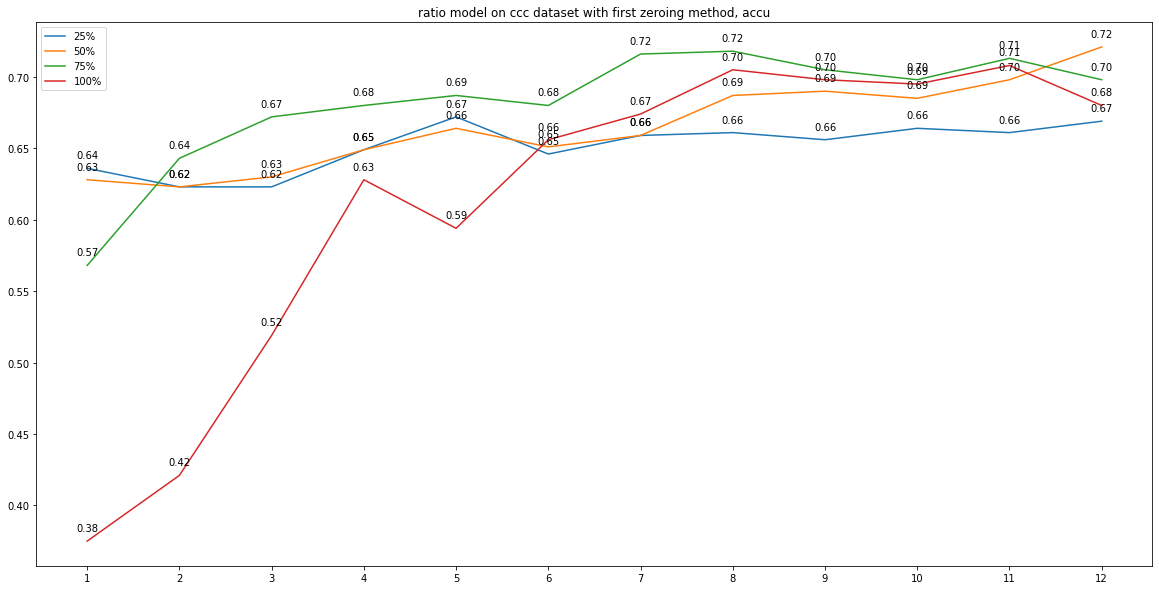

In [12]:
make_plots_across_share("ccc", "first", "ratio", "accu")

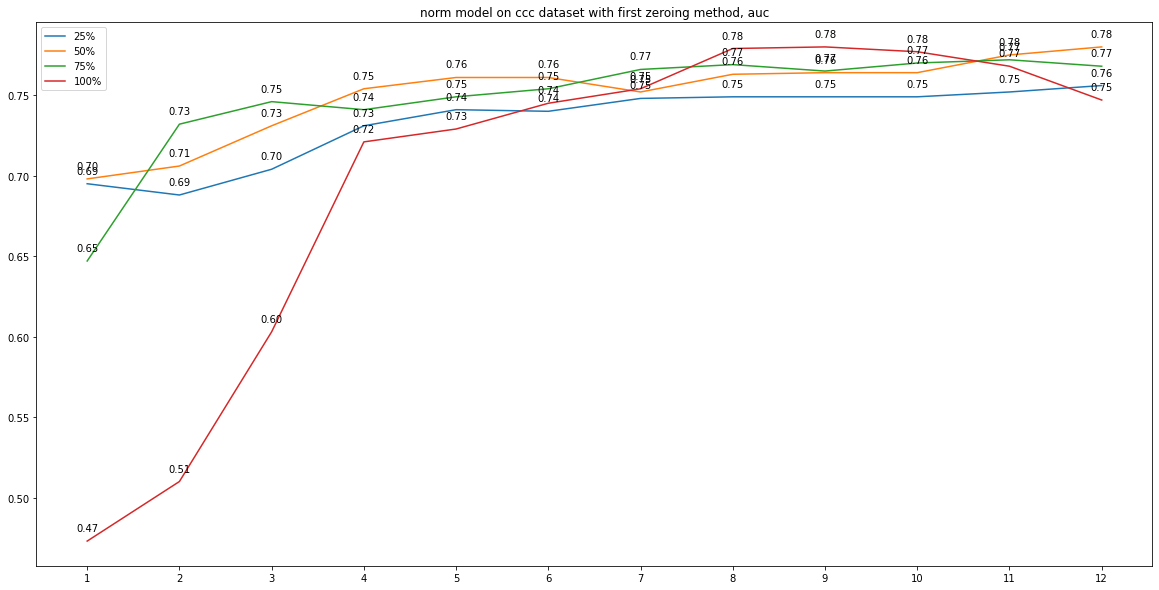

In [13]:
make_plots_across_share("ccc", "first", "norm", "auc")

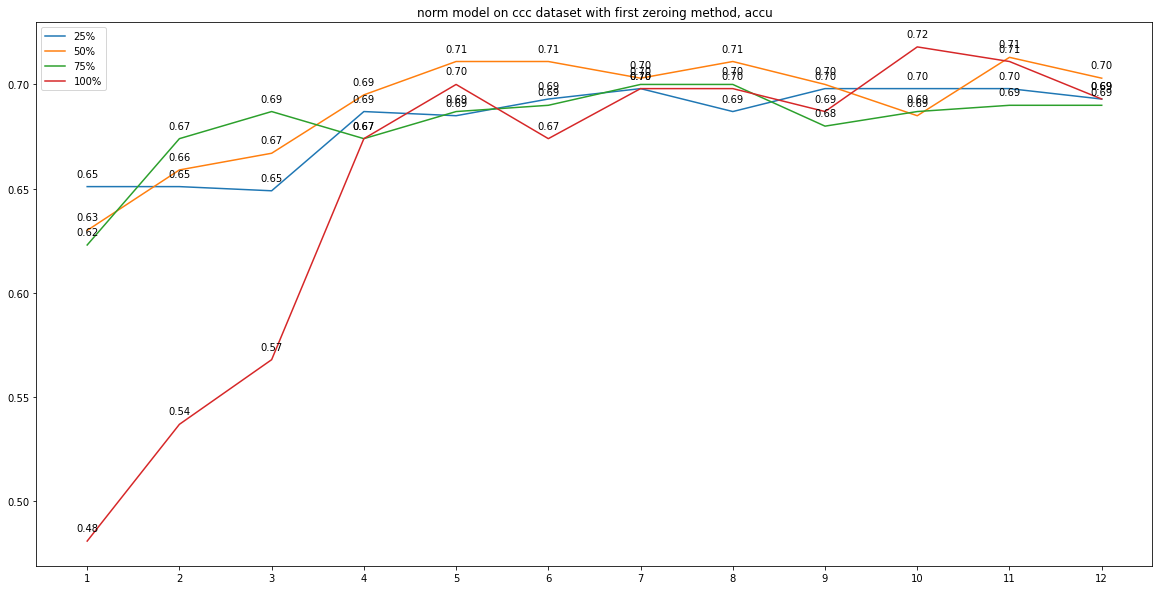

In [14]:
make_plots_across_share("ccc", "first", "norm", "accu")

In [40]:
def print_res(res_dict, model_type):
    """
    find the best configuration, including best index, AUC and accruacy
    if there are multiple indexes, find the index with highest accuracy

    :param res_dict: a dictionary contains all evaluation results
    :type res_dict: dict
    :param model_type: the model type, including 'ratio' and 'norm'
    :type model_type: str
    :return: the best configuration
    :rtype: int/list
    """
    best_auc = max(res_dict[model_type+"_auc"])
    best_index = [index for index, value in enumerate(res_dict[model_type+"_auc"]) \
        if value == best_auc]
    # if there is multiple best indexes
    if len(best_index) > 1:
        # find the highest accuracy
        accus = [res_dict[model_type+"_accu"][ind] for ind in best_index]
        best_accu = max(accus)
        best_index = [index for index, value in enumerate(accus)\
            if value == best_accu]
    else:
        best_accu = res_dict[model_type+"_accu"][best_index[0]]
    return best_index


def find_best_pattern(data_type, zero_style, model_type):
    share_25 = {"con_auc": [], "con_accu": [],
                 "con_cor": [], "con_ppl": [],
                 "dem_auc": [], "dem_accu": [],
                 "dem_cor": [], "dem_ppl": [],
                 "ratio_auc": [], "ratio_accu": [],
                 "ratio_cor": [], "ratio_ppl": [],
                 "norm_auc":[], "norm_accu":[],
                 "norm_cor":[], "norm_ppl":[]}
    share_50 = {"con_auc": [], "con_accu": [],
                 "con_cor": [], "con_ppl": [],
                 "dem_auc": [], "dem_accu": [],
                 "dem_cor": [], "dem_ppl": [],
                 "ratio_auc": [], "ratio_accu": [],
                 "ratio_cor": [], "ratio_ppl": [],
                 "norm_auc":[], "norm_accu":[],
                 "norm_cor":[], "norm_ppl":[]}
    share_75 = {"con_auc": [], "con_accu": [],
                 "con_cor": [], "con_ppl": [],
                 "dem_auc": [], "dem_accu": [],
                 "dem_cor": [], "dem_ppl": [],
                 "ratio_auc": [], "ratio_accu": [],
                 "ratio_cor": [], "ratio_ppl": [],
                 "norm_auc":[], "norm_accu":[],
                 "norm_cor":[], "norm_ppl":[]}
    share_100 = {"con_auc": [], "con_accu": [],
                 "con_cor": [], "con_ppl": [],
                 "dem_auc": [], "dem_accu": [],
                 "dem_cor": [], "dem_ppl": [],
                 "ratio_auc": [], "ratio_accu": [],
                 "ratio_cor": [], "ratio_ppl": [],
                 "norm_auc":[], "norm_accu":[],
                 "norm_cor":[], "norm_ppl":[]}
    file_25 = "../ppl/accumu_{}_{}_25.pkl".format(data_type, zero_style)
    file_50 = "../ppl/accumu_{}_{}_50.pkl".format(data_type, zero_style)
    file_75 = "../ppl/accumu_{}_{}_75.pkl".format(data_type, zero_style)
    file_100 = "../ppl/accumu_{}_{}_100.pkl".format(data_type, zero_style)
    with open(file_25, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            if isinstance(res_dict[key], list):
                share_25[key].extend(res_dict[key])
            else:
                share_25[key].append(res_dict[key])
    with open(file_50, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            if isinstance(res_dict[key], list):
                share_50[key].extend(res_dict[key])
            else:
                share_50[key].append(res_dict[key])
    with open(file_75, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            if isinstance(res_dict[key], list):
                share_75[key].extend(res_dict[key])
            else:
                share_75[key].append(res_dict[key])
    with open(file_100, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            if isinstance(res_dict[key], list):
                share_100[key].extend(res_dict[key])
            else:
                share_100[key].append(res_dict[key])
    
    sys.stdout.write("| dataset | best index| con AUC (SD)| con ACC (SD) | con r with MMSE (SD)| dem AUC (SD)| dem ACC (SD) | dem r with MMSE (SD)| ratio AUC (SD)| ratio ACC (SD) | ratio r with MMSE (SD)|\n")
    sys.stdout.write("| - | - | - | - | - | - | - | - | - | - | - |\n")
    format_result(share_25, model_type, data_type)
    format_result(share_50, model_type, data_type)
    format_result(share_75, model_type, data_type)
    format_result(share_100, model_type, data_type)
    
    
def format_result(res_dict, model_type, data_name):
    best_index = print_res(res_dict, model_type)
    best_index = best_index[0]
    best_dict = {}
    # narrow down to the best result
    for k, v in res_dict.items():
        try:
            if isinstance(v, list):
                best_dict[k] = v[best_index]
            else:
                best_dict[k] = v
        except IndexError:
            best_dict[k] = v[0]
    sys.stdout.write("| {} | {} | {} ({})| {} ({}) | {} ({})| {} ({})| {} ({}) | {} ({})| {} ({})| {} ({}) | {} ({})|\n".format(
        data_name, best_index+1,
        np.mean(best_dict["con_auc"]), np.std(best_dict["con_auc"]),
        np.mean(best_dict["con_accu"]), np.std(best_dict["con_accu"]),
        np.mean(best_dict["con_cor"]), np.std(best_dict["con_cor"]),
        np.mean(best_dict["dem_auc"]), np.std(best_dict["dem_auc"]),
        np.mean(best_dict["dem_accu"]), np.std(best_dict["dem_accu"]),
        np.mean(best_dict["dem_cor"]), np.std(best_dict["dem_cor"]),
        np.mean(best_dict["ratio_auc"]), np.std(best_dict["ratio_auc"]),
        np.mean(best_dict["ratio_accu"]), np.std(best_dict["ratio_accu"]),
        np.mean(best_dict["ratio_cor"]), np.std(best_dict["ratio_cor"])
    ))


In [41]:
find_best_pattern("adr", "first", "ratio")

| dataset | best index| con AUC (SD)| con ACC (SD) | con r with MMSE (SD)| dem AUC (SD)| dem ACC (SD) | dem r with MMSE (SD)| ratio AUC (SD)| ratio ACC (SD) | ratio r with MMSE (SD)|
| - | - | - | - | - | - | - | - | - | - | - |
| adr | 7 | 0.616 (0.0)| 0.613 (0.0) | -0.292 (0.0)| 0.399 (0.0)| 0.368 (0.0) | 0.033 (0.0)| 0.783 (0.0)| 0.716 (0.0) | -0.511 (0.0)|
| adr | 9 | 0.616 (0.0)| 0.613 (0.0) | -0.292 (0.0)| 0.367 (0.0)| 0.406 (0.0) | 0.116 (0.0)| 0.796 (0.0)| 0.716 (0.0) | -0.564 (0.0)|
| adr | 7 | 0.616 (0.0)| 0.613 (0.0) | -0.292 (0.0)| 0.26 (0.0)| 0.342 (0.0) | 0.373 (0.0)| 0.742 (0.0)| 0.645 (0.0) | -0.45 (0.0)|
| adr | 7 | 0.616 (0.0)| 0.613 (0.0) | -0.292 (0.0)| 0.428 (0.0)| 0.465 (0.0) | 0.073 (0.0)| 0.739 (0.0)| 0.652 (0.0) | -0.468 (0.0)|


In [42]:
find_best_pattern("db", "first", "ratio")

| dataset | best index| con AUC (SD)| con ACC (SD) | con r with MMSE (SD)| dem AUC (SD)| dem ACC (SD) | dem r with MMSE (SD)| ratio AUC (SD)| ratio ACC (SD) | ratio r with MMSE (SD)|
| - | - | - | - | - | - | - | - | - | - | - |
| db | 7 | 0.582 (0.0)| 0.563 (0.0) | -0.119 (0.0)| 0.425 (0.0)| 0.44 (0.0) | 0.011 (0.0)| 0.748 (0.0)| 0.687 (0.0) | -0.352 (0.0)|
| db | 9 | 0.582 (0.0)| 0.563 (0.0) | -0.119 (0.0)| 0.408 (0.0)| 0.448 (0.0) | 0.082 (0.0)| 0.688 (0.0)| 0.619 (0.0) | -0.301 (0.0)|
| db | 7 | 0.582 (0.0)| 0.563 (0.0) | -0.119 (0.0)| 0.303 (0.0)| 0.366 (0.0) | 0.316 (0.0)| 0.698 (0.0)| 0.616 (0.0) | -0.274 (0.0)|
| db | 8 | 0.582 (0.0)| 0.563 (0.0) | -0.119 (0.0)| 0.424 (0.0)| 0.44 (0.0) | 0.001 (0.0)| 0.744 (0.0)| 0.683 (0.0) | -0.38 (0.0)|


In [43]:
find_best_pattern("ccc", "first", "ratio")

| dataset | best index| con AUC (SD)| con ACC (SD) | con r with MMSE (SD)| dem AUC (SD)| dem ACC (SD) | dem r with MMSE (SD)| ratio AUC (SD)| ratio ACC (SD) | ratio r with MMSE (SD)|
| - | - | - | - | - | - | - | - | - | - | - |
| ccc | 12 | 0.74 (0.0)| 0.646 (0.0) | nan (nan)| 0.654 (0.0)| 0.628 (0.0) | nan (nan)| 0.715 (0.0)| 0.669 (0.0) | nan (nan)|
| ccc | 12 | 0.74 (0.0)| 0.646 (0.0) | nan (nan)| 0.607 (0.0)| 0.584 (0.0) | nan (nan)| 0.77 (0.0)| 0.721 (0.0) | nan (nan)|
| ccc | 11 | 0.74 (0.0)| 0.646 (0.0) | nan (nan)| 0.466 (0.0)| 0.473 (0.0) | nan (nan)| 0.78 (0.0)| 0.713 (0.0) | nan (nan)|
| ccc | 9 | 0.74 (0.0)| 0.646 (0.0) | nan (nan)| 0.515 (0.0)| 0.514 (0.0) | nan (nan)| 0.785 (0.0)| 0.698 (0.0) | nan (nan)|
